In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [11]:
#Creating csv files
data = { "area": [2600,3000,3200,3600,4000],	
"price":[550000,565000,610000,680000,725000]
}

In [12]:
df = pd.DataFrame(data)
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


In [13]:
df.to_csv("homeprices.csv",index=False)

### Applying Linear Regrssion Model

In [15]:
from sklearn import linear_model

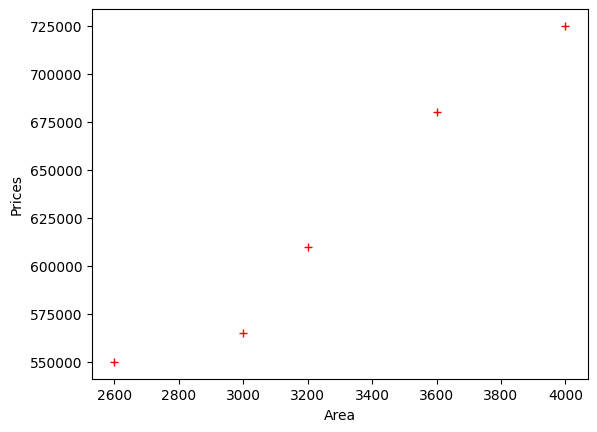

In [18]:
#No need to read the data as data is alreasy in dataframe
#Otherway we have to load the data to dataframee uusing read_csv
plt.plot(df['area'],df['price'],'r+')
plt.xlabel('Area')
plt.ylabel('Prices')
plt.show()

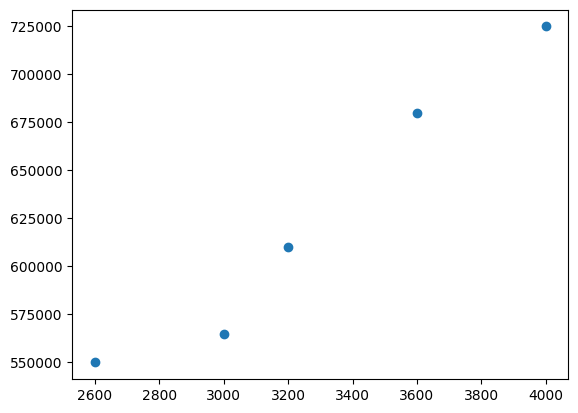

In [19]:
#using scatter plot direct to p-lot the graph
plt.scatter(df['area'],df['price'])

In [27]:
new_df = df.drop('price',axis='columns')
new_df

,area
0,2600
1,3000
2,3200
3,3600
4,4000


In [28]:
price = df.price
price

0    550000
1    565000
2    610000
3    680000
4    725000
Name: price, dtype: int64

In [29]:
# Creating linear regression model
reg = linear_model.LinearRegression()
reg.fit(new_df,price)

LinearRegression()

(1) Predict price of a home with area = 3300 sqr ft

In [30]:
reg.predict([[3300]])

C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([628715.75342466])

In [31]:
reg.coef_

array([135.78767123])

In [32]:
reg.intercept_

180616.43835616432

Y = m * X + b (m is coefficient and b is intercept)

In [33]:
3300*135.78767123 + 180616.43835616432

628715.7534151643

(1) Predict price of a home with area = 5000 sqr ft



In [34]:
reg.predict([[5000]])

C:\Users\harsh\AppData\Roaming\Python\Python311\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([859554.79452055])

### Generate CSV file with list of home price predictions

In [35]:
area_df = pd.read_csv("areas.csv")
area_df.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [36]:
p = reg.predict(area_df)
p

array([ 316404.10958904,  384297.94520548,  492928.08219178,
        661304.79452055,  740061.64383562,  799808.21917808,
        926090.75342466,  650441.78082192,  825607.87671233,
        492928.08219178, 1402705.47945205, 1348390.4109589 ,
       1144708.90410959])

In [37]:
area_df['prices']=p
area_df

,area,prices
0,1000,3.164041e+05
1,1500,3.842979e+05
2,2300,4.929281e+05
3,3540,6.613048e+05
4,4120,7.400616e+05
5,4560,7.998082e+05
6,5490,9.260908e+05
7,3460,6.504418e+05
8,4750,8.256079e+05
9,2300,4.929281e+05


In [ ]:
area_df.to_csv("prediction.csv")